# TP2

## Integrantes
* Hagata, Juan Pablo
* Sossa, Fabian
* Yélamos, Fausto Juárez

In [3]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

Parte 1 (imágenes en /white_patch y /coord_cromaticas)

1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

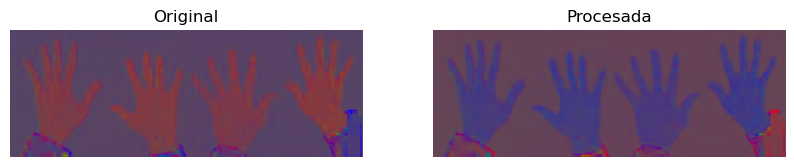

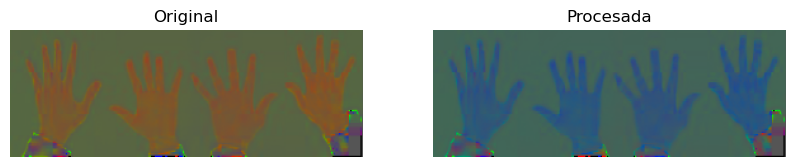

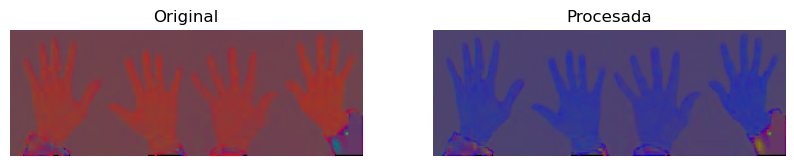

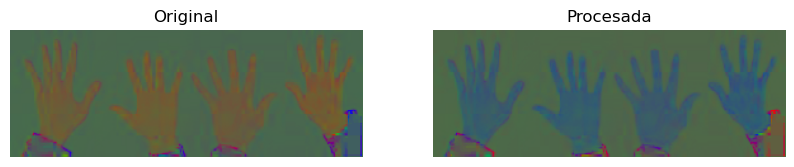

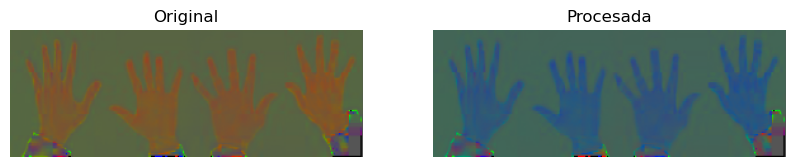

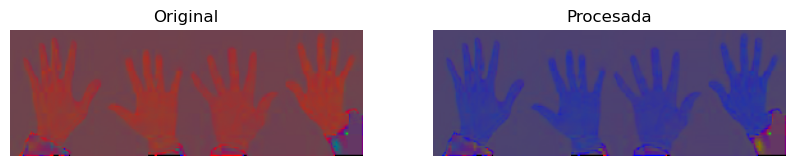

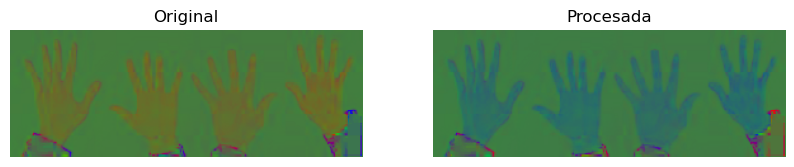

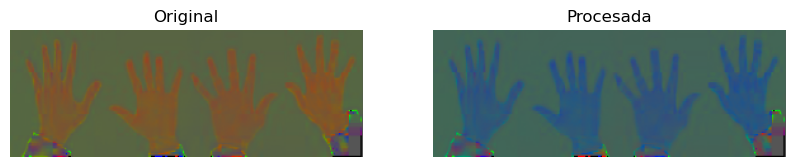

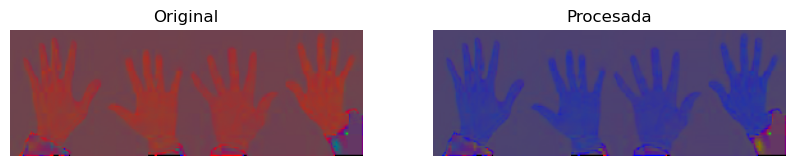

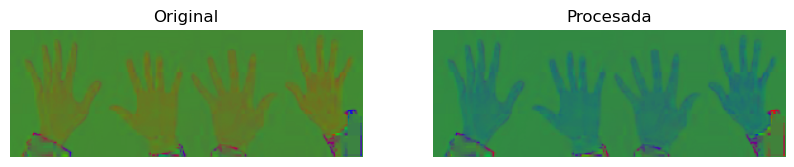

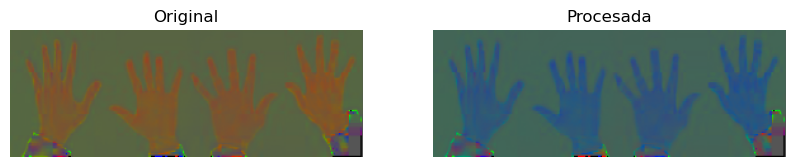

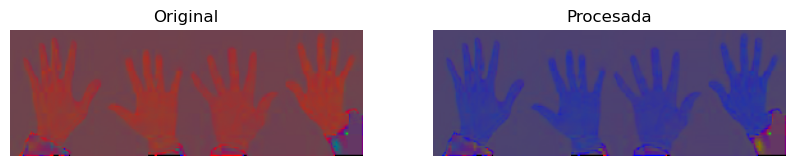

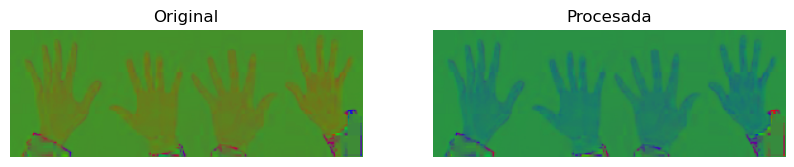

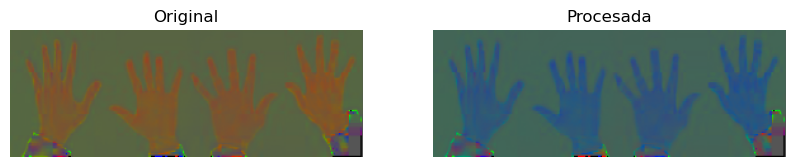

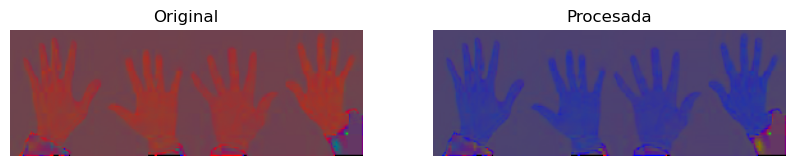

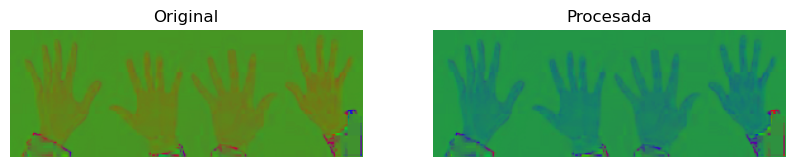

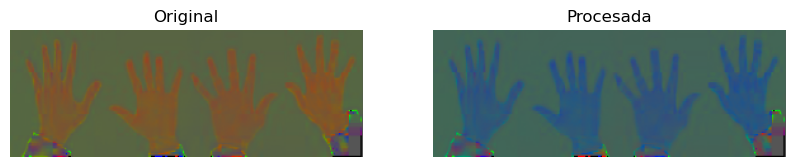

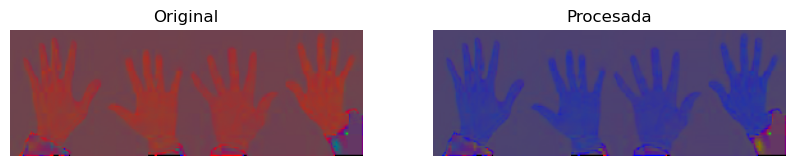

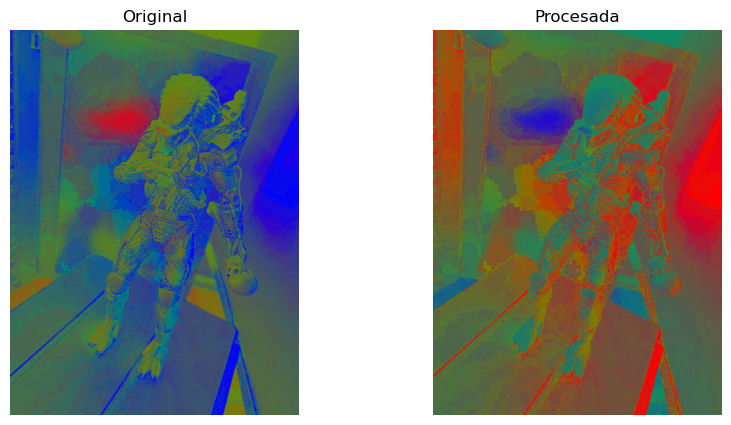

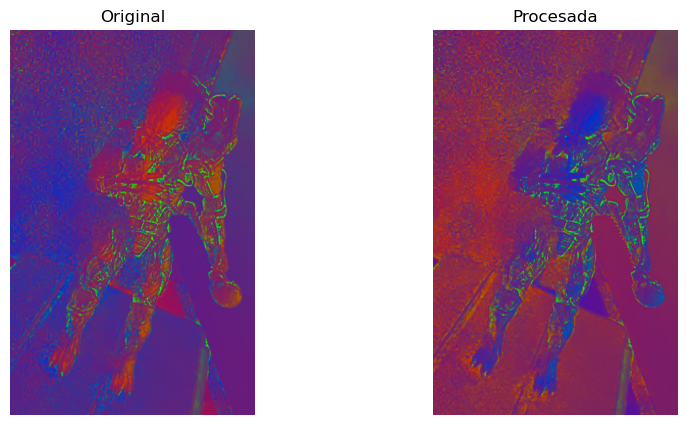

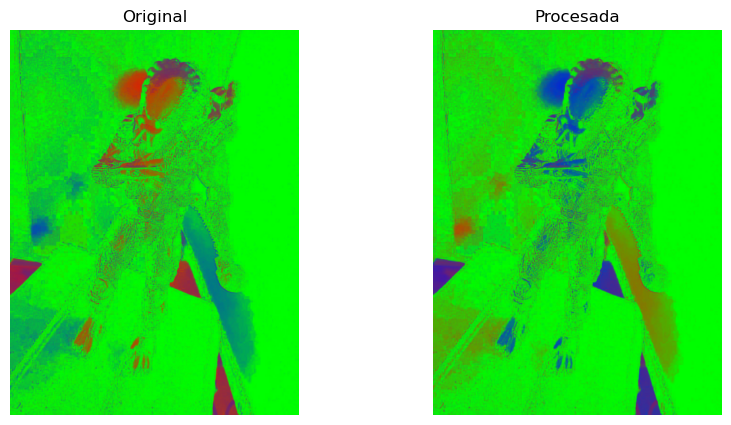

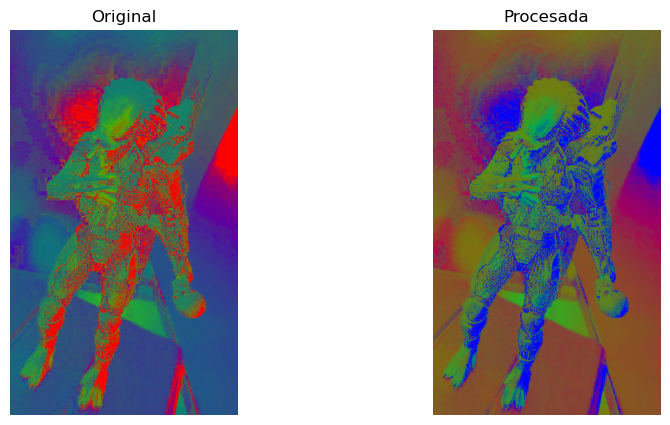

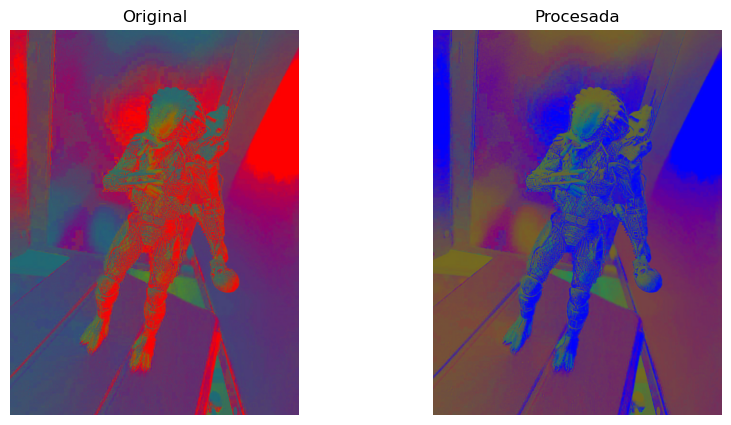

KeyboardInterrupt: 

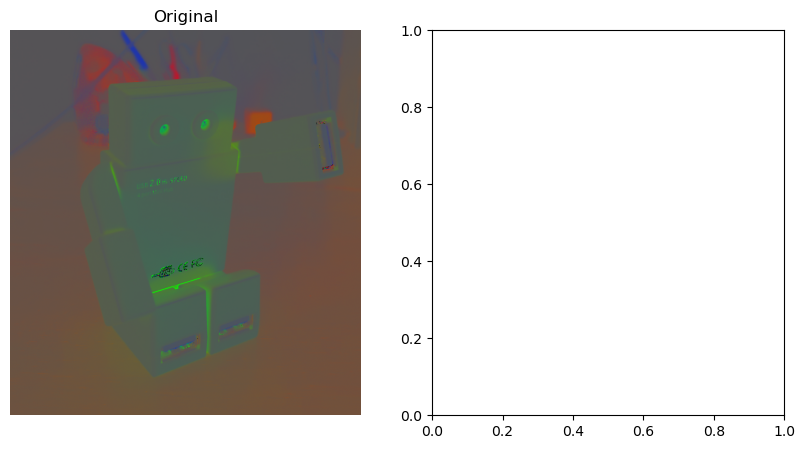

In [4]:
def coord_cromaticas(url_img):
    # Cargar la imagen
    image = cv2.imread(url_img)
    # Convertir a formato de punto flotante
    image_float = image.astype(np.float32)
    # Sumar los canales RGB
    sum_channels = image_float.sum(axis=2, keepdims=True)
    # Evitar divisiones por cero
    sum_channels[sum_channels == 0] = 1
    # Calcular coordenadas cromáticas r', g' (se puede derivar b' como 1 - r' - g')
    chromatic_image = image_float / sum_channels
    # Escalar las coordenadas cromáticas para visualización
    chromatic_image = (chromatic_image * 255).astype(np.uint8)
    return chromatic_image

# Mostrar la imagen resultante
# Mostrar las imágenes usando Matplotlib
for filename in os.listdir('coord_cromaticas'):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = os.path.join('coord_cromaticas', filename)
        plt.figure(figsize=(10, 5))
        # Mostrar imagen original
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
        plt.title('Original')
        plt.axis('off')
        # Mostrar imagen procesada
        plt.subplot(1, 2, 2)
        plt.imshow(coord_cromaticas(image_path))
        plt.title('Procesada')
        plt.axis('off')    
        # Mostrar ambas imágenes
        plt.show()
#cv2.imshow('Imagen en Coordenadas Cromáticas', coord_cromaticas('coord_cromaticas/CoordCrom_3.png'))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

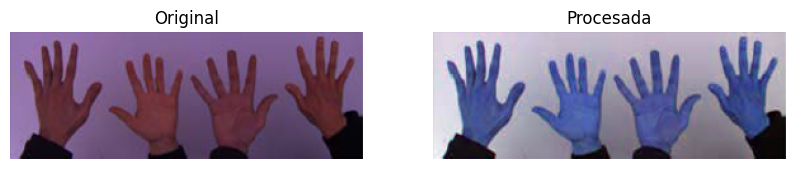

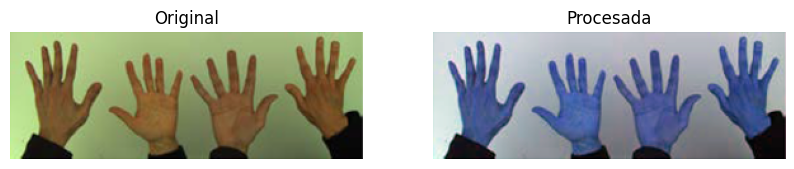

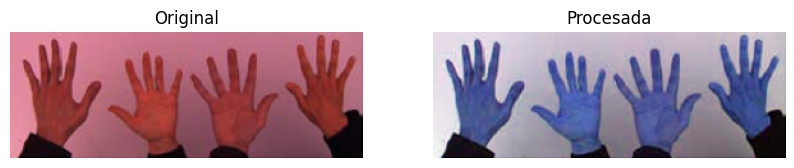

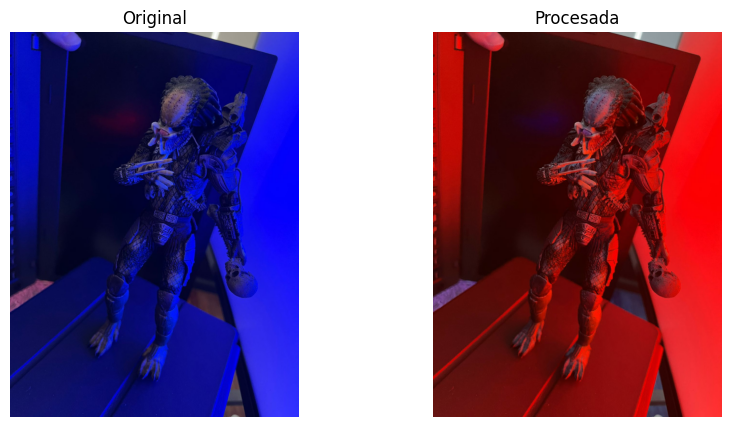

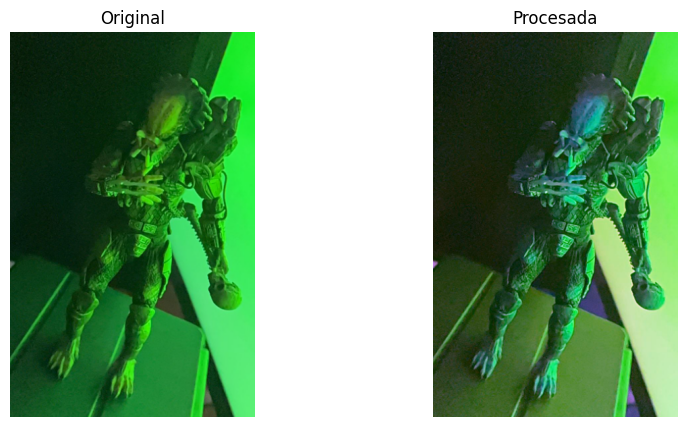

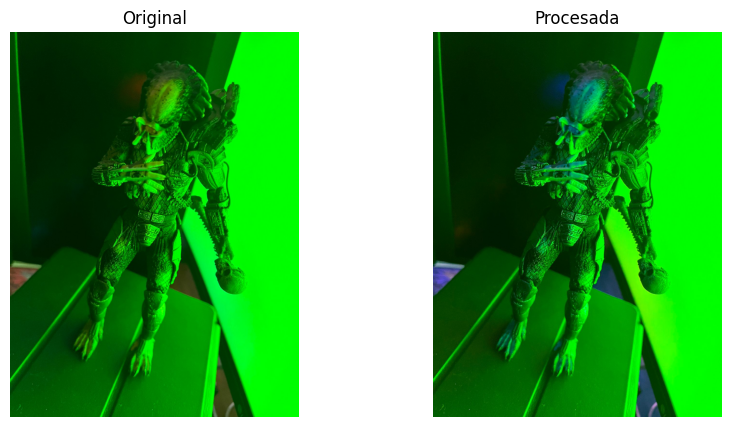

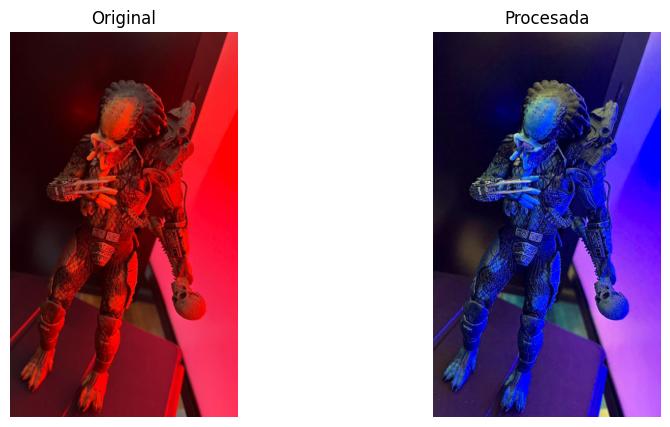

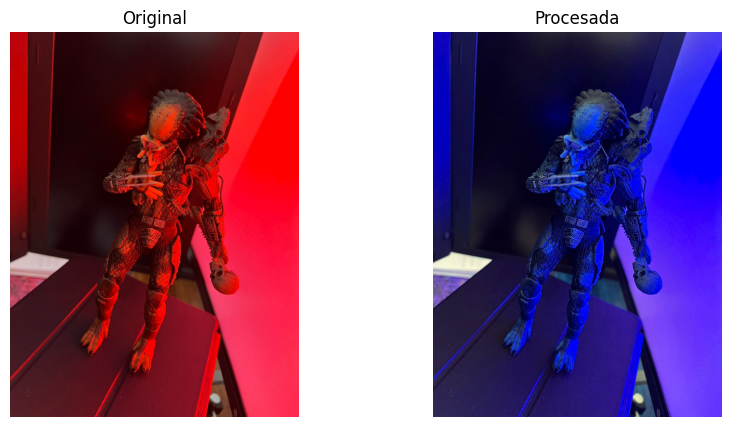

In [14]:
def white_patch(url_img):
    # Cargar la imagen
    image = cv2.imread(url_img)
    # Convertir la imagen a formato flotante
    image_float = image.astype(np.float32)
    # Encontrar el valor máximo para cada canal (R, G, B)
    max_r = np.max(image_float[:, :, 2])  # Canal R (Rojo)
    max_g = np.max(image_float[:, :, 1])  # Canal G (Verde)
    max_b = np.max(image_float[:, :, 0])  # Canal B (Azul)
    # Normalizar cada canal por su valor máximo
    image_float[:, :, 2] = image_float[:, :, 2] / max_r
    image_float[:, :, 1] = image_float[:, :, 1] / max_g
    image_float[:, :, 0] = image_float[:, :, 0] / max_b
    # Escalar los valores de los canales para que estén entre 0 y 255
    image_white_balanced = np.clip(image_float * 255.0, 0, 255).astype(np.uint8)
    return image_white_balanced


# Mostrar la imagen resultante
for filename in os.listdir('white_patch'):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = os.path.join('white_patch', filename)
        plt.figure(figsize=(10, 5))
        # Mostrar imagen original
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
        plt.title('Original')
        plt.axis('off')
        # Mostrar imagen procesada
        plt.subplot(1, 2, 2)
        plt.imshow(white_patch(image_path))
        plt.title('Procesada')
        plt.axis('off')    
        # Mostrar ambas imágenes
        plt.show()


#cv2.imshow('Imagen con White Patch', white_balanced_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

### Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘ features ’ a los histogramas
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas.

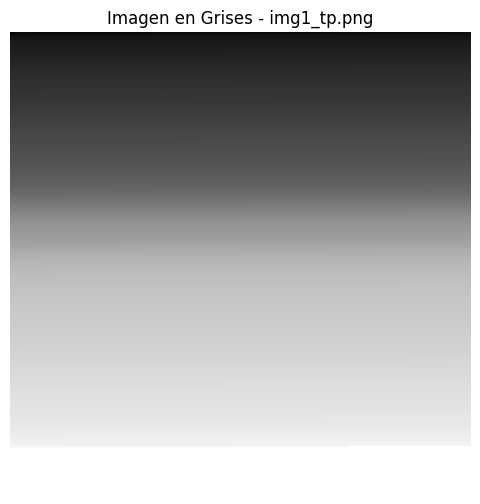

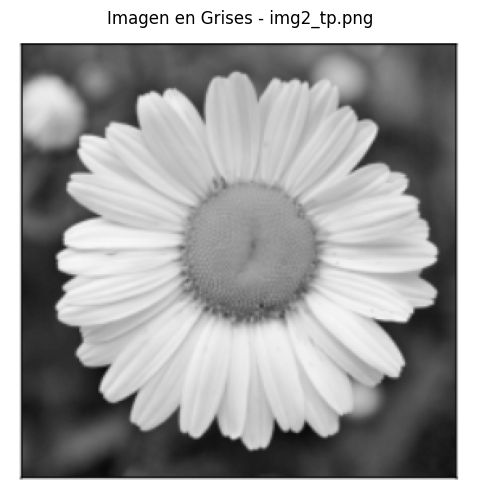

In [16]:
images = ['img1_tp.png', 'img2_tp.png']

for image_name in images:
    img = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)    
    # Mostrar la imagen en escala de grises
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.title(f'Imagen en Grises - {image_name}')
    plt.axis('off')
    plt.show()

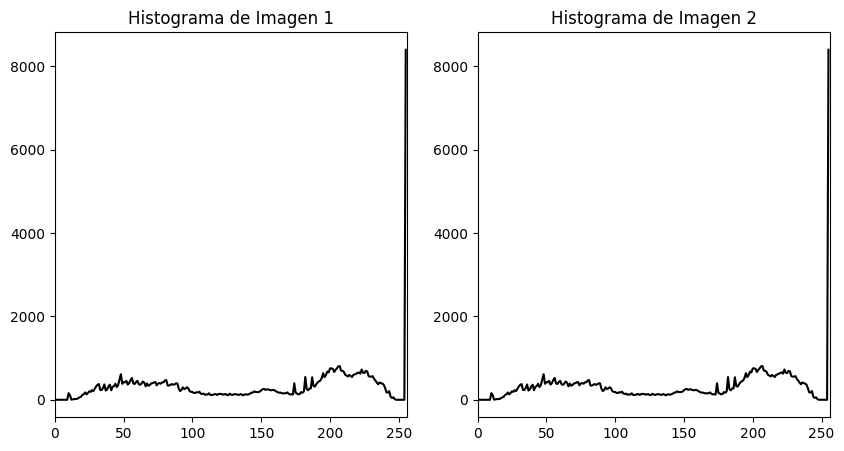

In [21]:
def calcular_histograma(image, ax, title):    
    # Calcular el histograma
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])    
    # Graficar el histograma
    ax.plot(hist, color='black')
    ax.set_title(title)
    ax.set_xlim([0, 256])


# Crear una figura para comparar los histogramas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
cont = 1
for image_name in images:
    img = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)
    calcular_histograma(img, axes[cont-1], 'Histograma de Imagen ' + str(cont))
    cont  = cont + 1
plt.show()

Un modelo de clasificación o detección de imágenes, el uso de histogramas como features podría ser útil, ya que:

* Los histogramas capturan la distribución de la intensidad de los píxeles, lo que es indicativo de las características visuales globales de una imagen, como el brillo, el contraste o el tono dominante.
* En ciertas tareas de clasificación de imágenes (como detección de objetos o análisis de texturas), la información de color y brillo puede ser un buen diferenciador entre clases.
* En escenarios donde el contenido de la imagen es altamente dependiente de la iluminación, los histogramas te permiten normalizar las imágenes o detectar patrones de intensidad que son más fáciles de clasificar.
Sin embargo, los histogramas por sí solos no capturan la estructura espacial de la imagen (por ejemplo, las formas u objetos en la imagen). Para tareas más complejas, pueden combinarse con otras características como bordes, texturas o características extraídas mediante redes neuronales.
* En este caso particular se observa que tanto la imagen 1 como la image 2 tiene un histograma similar, pero que si observamos las imagenes son distintas.

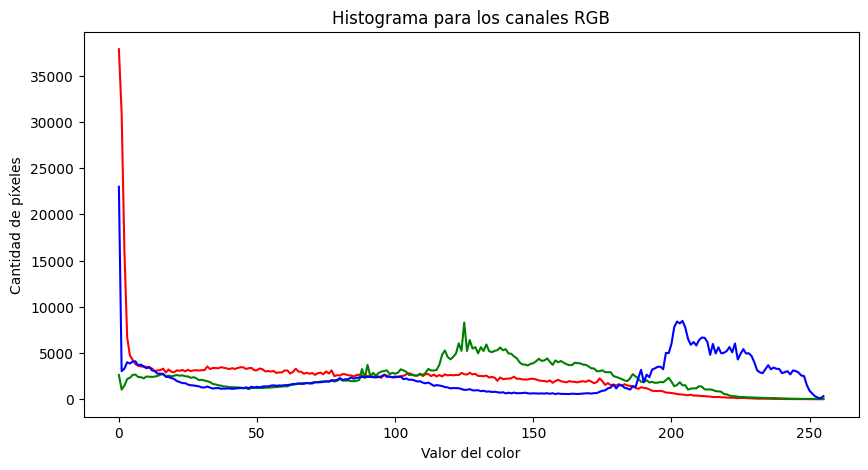

In [23]:
# Cargar la imagen
image = cv2.imread('segmentacion.png')

# Convertir la imagen de BGR a RGB para trabajar con ella
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calcular los histogramas para cada canal de color (R, G, B)
colors = ('r', 'g', 'b')
channel_ids = (0, 1, 2)
plt.figure(figsize=(10, 5))

# Dibujar el histograma para cada canal de color
for channel_id, color in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image_rgb[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

# Configuraciones del gráfico
plt.title("Histograma para los canales RGB")
plt.xlabel("Valor del color")
plt.ylabel("Cantidad de píxeles")
plt.show()

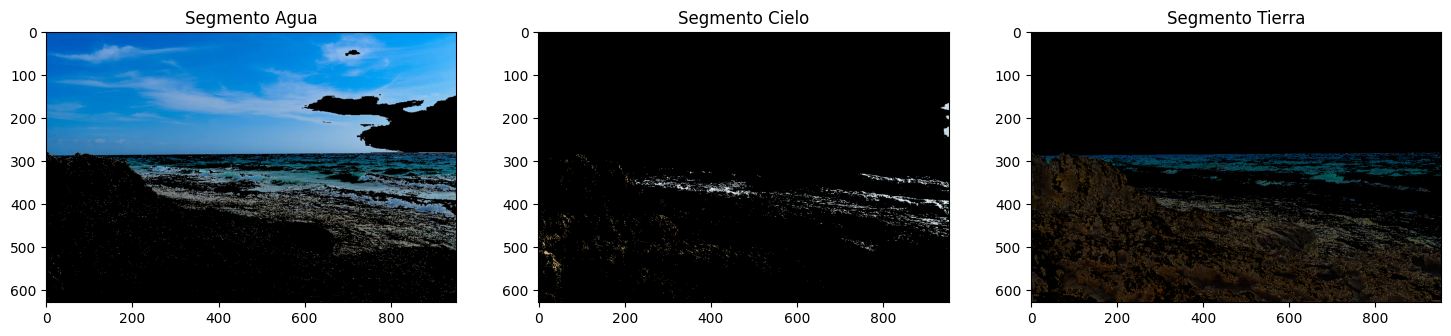

In [22]:
# Cargar la imagen
image = cv2.imread('segmentacion.png')

# Convertir la imagen de BGR a RGB para visualizarla
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Función para aplicar máscaras
def apply_mask(image, lower_bound, upper_bound):
    # Crear una máscara basada en los límites de color
    mask = cv2.inRange(image, lower_bound, upper_bound)
    # Aplicar la máscara para obtener la región segmentada
    segmented = cv2.bitwise_and(image, image, mask=mask)
    return segmented

# Definir los rangos de color (agua, cielo, tierra)
# Estos son valores aproximados que puedes ajustar según la imagen
water_lower = np.array([100, 50, 0], dtype="uint8")
water_upper = np.array([255, 255, 150], dtype="uint8")

sky_lower = np.array([90, 150, 200], dtype="uint8")
sky_upper = np.array([255, 255, 255], dtype="uint8")

earth_lower = np.array([0, 0, 0], dtype="uint8")
earth_upper = np.array([100, 100, 100], dtype="uint8")

# Aplicar las máscaras
water_segment = apply_mask(image, water_lower, water_upper)
sky_segment = apply_mask(image, sky_lower, sky_upper)
earth_segment = apply_mask(image, earth_lower, earth_upper)

# Convertir las imágenes segmentadas de BGR a RGB para visualizar
water_segment_rgb = cv2.cvtColor(water_segment, cv2.COLOR_BGR2RGB)
sky_segment_rgb = cv2.cvtColor(sky_segment, cv2.COLOR_BGR2RGB)
earth_segment_rgb = cv2.cvtColor(earth_segment, cv2.COLOR_BGR2RGB)

# Visualizar las imágenes segmentadas
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(water_segment_rgb)
plt.title('Segmento Agua')

plt.subplot(1, 3, 2)
plt.imshow(sky_segment_rgb)
plt.title('Segmento Cielo')

plt.subplot(1, 3, 3)
plt.imshow(earth_segment_rgb)
plt.title('Segmento Tierra')

plt.show()